## Projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER )

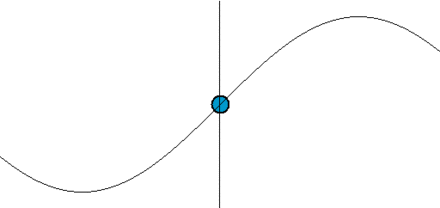

# <h1 style="color:purple"> Objetivo

O projeto WPT (WIRELESS POWER TRANSFER) consiste em um mecanismo de transmissão de energia sem fio por intermédio do eletromagnetismo e ondulatória.


In [1]:
#Importando Bibliotecas 
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

## <li style="color:purple"> Etapa 1
### Atividade 1

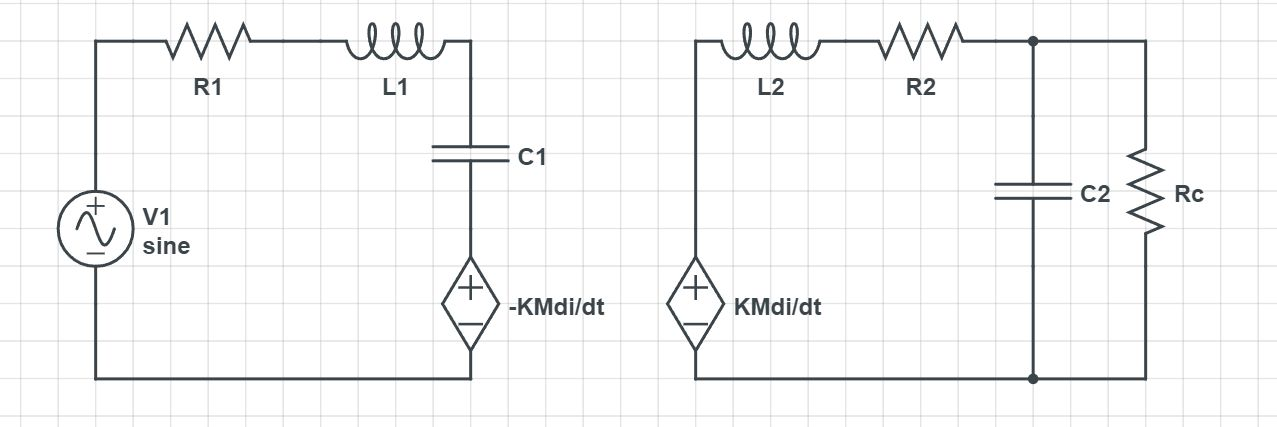

Circuito com um capacitor em série no primário e um em paralelo no secundário 

In [2]:
#Função para as correntes no transformador agora com o capacitor em série no primário e em paralelo no secundário
def CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM):
    Z=np.array([[R1+XL1+XC1, -XM],[XM, -XL2-R2-(1/(1/XC2+1/Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

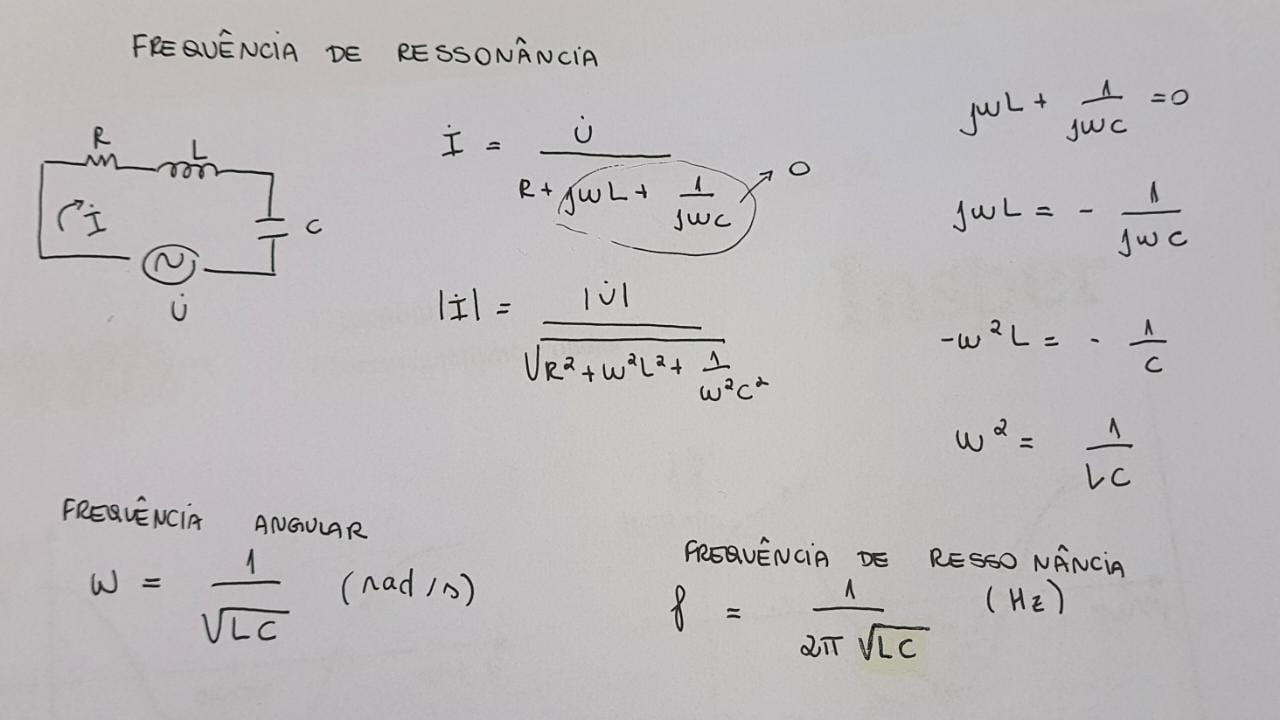

In [3]:
#função de ressonância 
def Reso(L1, L2, C1, C2): 
    Reso1=1/(2*pi*sqrt(L1*C1))
    Reso2=1/(2*pi*sqrt(L2*C2))
    return Reso1, Reso2



### Atividade 2

Criando Funções de Operação 

In [4]:
#função de Indutância mútua 
def M(k,L1, L2): 
    return k*sqrt(L1*L2)

In [5]:
#Definição de Dados Iniciais do TRANSFORMADOR 
Uf=5
C1=0.1e-6
C2=0.1e-6
L1=196e-6
L2=196e-6
R1=0.5
R2=0.5
K=1
f=60 #frequencia
w=2*pi*f#calculando a frequencia angular
Rc=300

In [6]:
XC1=1/(1j*w*C1) #Capacitância 1
XC2=1/(1j*w*C2) #Capacitância 2 
XL1=1j*w*L1 #Indutância 1
XL2=1J*w*L2 #Indutância 2 
XM=1j*w*M(K,L1,L2)# Indutância Mútua


print('A indutância Mútua é', abs(M(K,L1,L2)),)
print("A frequência de ressonância é {:.0f} Hz!".format(abs(Reso(L1,L2,C1,C2)[0])))
print('A corrente i1 é {} A'.format(abs(CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM)[0])))
print('A corrente i2 é {} A'.format(abs(CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM)[1])))


A indutância Mútua é 0.000196
A frequência de ressonância é 35949 Hz!
A corrente i1 é 0.00018849608425747854 A
A corrente i2 é 4.6352590725565e-08 A


### Atividade 3 e 4

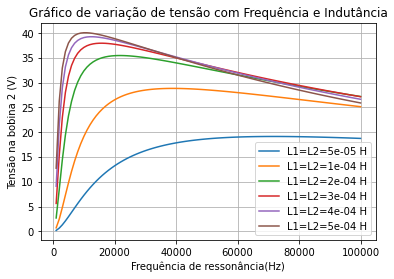

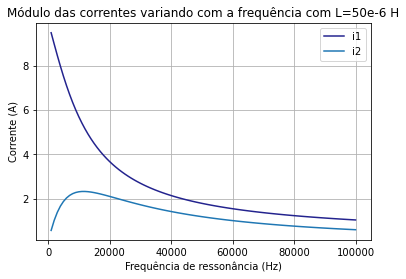

In [7]:
K_2=0.1
Rc_2=400 #valor de resistência do componente que se quer alimentar 

list_indutancias=[50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]
lista_frequencias=np.linspace(1e3, 100e3, 100)

lista_i1=[]
lista_i2=[]

for L in list_indutancias: 
    L1_2=L #Indutor no primário 
    L2_2=L #Indutor no secundário 
    lista_Ufs=[]
    for freq in lista_frequencias: 
        w_2=2*pi*freq #frequencia angular variável 
        #recalculando com base em cada valor da lista de frequências 
        C1_2=1/(L1_2*w_2**2) #Capacitor no primário 
        C2_2=1/(L2_2*w_2**2) #Capacitor no secundário
        R1_2=0.5+0.5*5*freq/100e3 #Resistor no primário 
        R2_2=0.5+0.5*5*freq/100e3 #Resistor no secundário
        XC1_2=1/(1j*w_2*C1_2) #Capacitância 1
        XC2_2=1/(1j*w_2*C2_2)#Capacitância 2
        XL1_2=1j*w_2*L1_2 #Indutância 1
        XL2_2=1J*w_2*L2_2 #Indutãncia 2
        XM_2=1j*w_2*M(K_2,L1_2,L2_2) #Indutância Mútua
        i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_2) #correntes no primário e no secundário
        Resistencia_equivalente=1/(1/Rc_2+1/XC2_2) 
        Vsaida=Resistencia_equivalente*i2  #tensão de saída no secundário 
        lista_Ufs.append(abs(Vsaida)) #lista com os valores de tensão no secundário
        if L==50e-6: 
            lista_i1.append(abs(i1))
            lista_i2.append(abs(i2))
    
    plt.plot(lista_frequencias,lista_Ufs, label="L1=L2=%.0e H" %L)

    


plt.xlabel("Frequência de ressonância(Hz)")
#ax=plt.axes()
#ax.set_facecolor("#CDCDCD")
plt.ylabel("Tensão na bobina 2 (V)")
plt.title("Gráfico de variação de tensão com Frequência e Indutância")
plt.legend()
plt.grid()
plt.show()



plt.plot(lista_frequencias, lista_i1, label='i1', color='#23238E')
plt.plot(lista_frequencias, lista_i2, label='i2')
plt.title("Módulo das correntes variando com a frequência com L=50e-6 H")
plt.xlabel("Frequência de ressonância (Hz)")
plt.ylabel("Corrente (A)")
plt.legend()
plt.grid(True)
plt.show()
        

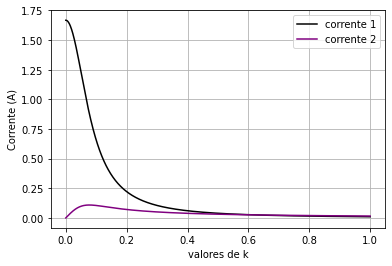

In [8]:
#considerando uma dada frequencia e indutancia fixas
f=100e3 #Hz
L=50e-6
w_2=2*pi*freq #frequencia angular variável 
#recalculando com base em cada valor da lista de frequências 
C1_2=1/(L1_2*w_2**2) #Capacitor no primário 
C2_2=1/(L2_2*w_2**2) #Capacitor no secundário
R1_2=0.5+0.5*5*freq/100e3 #Resistor no primário 
R2_2=0.5+0.5*5*freq/100e3 #Resistor no secundário
XC1_2=1/(1j*w_2*C1_2) #Capacitância 1
XC2_2=1/(1j*w_2*C2_2)#Capacitância 2
XL1_2=1j*w_2*L1_2 #Indutância 1
XL2_2=1J*w_2*L2_2 #Indutãncia 2

lista_ks=np.linspace(0,1,1000)

lista_i1=[]
lista_i2=[]
for k_2 in lista_ks:
    
    XM_3=1j*w_2*M(k_2,L1_2,L2_2) #Indutância Mútua
    i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_3)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
plt.plot(lista_ks, lista_i1, label='corrente 1', color='black')
plt.plot(lista_ks, lista_i2, label='corrente 2', color='purple')
plt.xlabel('valores de k')
plt.ylabel('Corrente (A)')
plt.legend()
plt.grid(True)
    
        





### Atividade 5


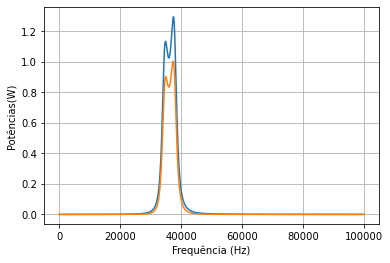

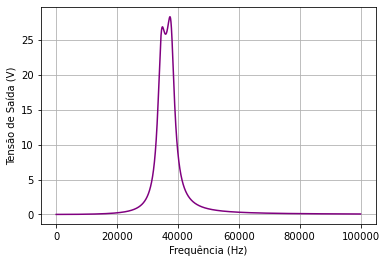

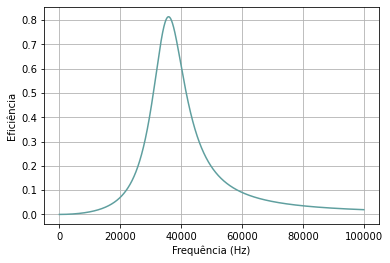

In [9]:
V1=10/pi
k_3=0.11
Rc=400

lista_V2_saida=[]
lista_potencia_entrada=[]
lista_potencia_saida=[]
lista_eficiencia=[]

lista_freq=np.arange(10,100000, 10)

for freq in lista_freq: 
    R1=R2=0.5
    w_3=2*pi*freq
    C1_3=C2_3=0.1e-6
    L1_3=L2_3=196e-6
    XC1_3=1/(1j*w_3*C1)
    XC2_3=1/(1j*w_3*C2)
    XL1_3= 1j*w_3*L1_3
    XL2_3=1j*w_3*L2_3
    XM_3=1j*w_3*M(k_3,L1_3,L2_3)    
    i1_3, i2_3=CalcularTransformador(V1, Rc,R1,R2, XC1_3, XC2_3, XL1_3, XL2_3, XM_3) 
    Sprima=V1/sqrt(2)*i1_3.conjugate()/sqrt(2)
    #print(Sprima)
    lista_potencia_entrada.append(Sprima.real)
    Zeq=1/(1/XC2_3+1/Rc)
    V2_saida=Zeq*i2_3
    #print(V2_saida)
    lista_V2_saida.append(abs(V2_saida))
    Ic=V2_saida/Rc
    S_secun=V2_saida/sqrt(2)*(Ic.conjugate()/sqrt(2))
    #print(S_secun)
    lista_potencia_saida.append(S_secun.real)
    lista_eficiencia.append(S_secun.real/Sprima.real)
    
plt.plot(lista_freq, lista_potencia_entrada, label='Potência de entrada')
plt.plot(lista_freq, lista_potencia_saida, label='Potência de saída')
plt.title('')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potências(W)')
plt.grid(True)
plt.show()

plt.plot(lista_freq, lista_V2_saida, color='purple')
plt.title('')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Tensão de Saída (V)')
plt.grid(True)
plt.show()
    
plt.plot(lista_freq, lista_eficiencia, color="#5F9F9F")
plt.title('')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Eficiência')
plt.grid(True)
plt.show()

Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶) com 
o coeficiente de acoplamento 𝑘: para essa atividade, use a frequência de ressonância natural do 
conjunto 𝐿𝐶, que ficará fixa para diferentes valores de 𝑘. A ideia, com a simulação, é identificar se existe 
um fator de acoplamento ótimo, com o qual a tensão no secundário é máxima (e, por conseguinte, a 
potência recebida também será máxima).

Vp com
50
0.057787116220223575
k max
0.0

[0.057787116220223575]
Vp com
100
0.05989065277480353
k max
0.0

[0.057787116220223575, 0.05989065277480353]
Vp com
150
0.06030600584169344
k max
0.0

[0.057787116220223575, 0.05989065277480353, 0.06030600584169344]
Vp com
200
0.0604534340641722
k max
0.0

[0.057787116220223575, 0.05989065277480353, 0.06030600584169344, 0.0604534340641722]
Vp com
250
0.060522039311626516
k max
0.0

[0.057787116220223575, 0.05989065277480353, 0.06030600584169344, 0.0604534340641722, 0.060522039311626516]
Vp com
300
0.0605594043962918
k max
0.0

[0.057787116220223575, 0.05989065277480353, 0.06030600584169344, 0.0604534340641722, 0.060522039311626516, 0.0605594043962918]
Vp com
350
0.06058196783635806
k max
0.0

[0.057787116220223575, 0.05989065277480353, 0.06030600584169344, 0.0604534340641722, 0.060522039311626516, 0.0605594043962918, 0.06058196783635806]
Vp com
400
0.06059662588041617
k max
0.0

[0.057787116220223575, 0.05989065277480353, 0.06030600584169344, 0

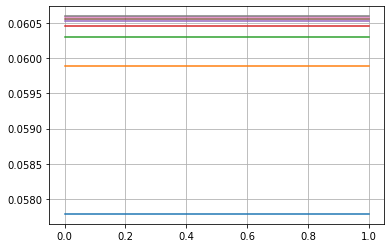

In [12]:
lista_Vp=[]
lista_kmax=[]

#função para encontrar o k onde ocorre Vp
def kcomVp(l_k,lista_V2_saida):
    c=0
    Vp=max(lista_V2_saida)
    for n in range(0,len(lista_V2_saida)):
        if lista_V2_saida[n]>=Vp-0.001:
            c=n
            break
    return l_k[c]

Rs=[50,100,150,200,250,300,350,400] #valores de resistência
      
for r in Rs:
    l_Vout=[]
    for k_4 in lista_ks:
        R1=R2=0.5
        freq=100e3
        w_4=2*pi*freq
        C1_4=C2_4=0.1e-6
        L1_4=L2_4=196e-6
        XC1_4=1/(1j*w_4*C1_4)
        XC2_4=1/(1j*w_4*C2_4)
        XL1_4= 1j*w_4*L1_4
        XL2_4=1j*w_4*L2_4
        XM_4=1j*w_4*M(k_4,L1_4,L2_4)    
        i1_4, i2_4=CalcularTransformador(V1,r,R1,R2,XC1_4,XC2_4,XL1_4,XL2_3,XM_3) 
#         Sprima=V1/sqrt(2)*i1_4.conjugate()/sqrt(2)
#         lista_potencia_entrada.append(Sprima.real)
        Zeq=1/(1/XC2_3+1/r)
        V2_saida=Zeq*i2_3
        l_Vout.append(abs(V2_saida))
        
    kmax=kcomVp(lista_ks,l_Vout)
    print('Vp com')
    print(r)
    print(max(l_Vout))
    print('k max')
    print(kmax)
    print()
#         Ic=V2_saida/Rc
#         S_secun=V2_saida/sqrt(2)*(Ic.conjugate()/sqrt(2))
#         lista_potencia_saida.append(S_secun.real)
#         lista_eficiencia.append(S_secun.real/Sprima.real)
    lista_Vp.append(max(l_Vout))
    lista_kmax.append(kmax)
    print(lista_Vp)


    plt.plot(lista_ks,l_Vout)
    
    

plt.grid(True)
plt.show()